In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
from __future__ import print_function
from numpy import *
from scipy import *
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import scipy as sp


import seawater
import datetime as dt
""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('seaborn-whitegrid')
import netCDF4 as nc

import cmocean as cm
import glob
import sys
sys.path.append('/data/tjarniko/mocsy')
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/CCCmaDEV/CCCma_src')
import mocsy
import CCCma
import CCCma_stations as cs
from matplotlib import reload
import arrow
import gsw
%matplotlib inline

/home/tjarniko/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [4]:

BR_2016_1_nc = nc.Dataset('./massbal_to_nc/MASSBAL_BR_2016_1_fullyear.nc')
SSH_2016_1_nc = nc.Dataset('./massbal_to_nc/MASSBAL_SSH_2016_to0831.nc')


In [6]:
import numpy as np
w = np.random.rand(365,898,398)
w2 = np.mean(w, axis = 1)
w3 = np.mean(w2, axis = 1)
print(np.shape(w3))

(365,)


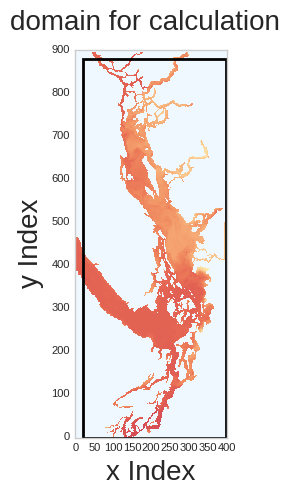

In [5]:
t_nc = nc.Dataset('/results2/SalishSea/nowcast-green.201806/01jan18/SalishSea_1h_20180101_20180101_grid_T.nc')
surfdat_1 = t_nc.variables['votemper'][0,0,:,:]

fig, ax = plt.subplots(1, 1, figsize=(5, 5), sharey=True)
cmap = cm.cm.matter
tplt = np.ma.masked_values(surfdat_1[:,:],0)
v_min = 2000
v_max = 2000

viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(tplt, cmap=cm.cm.matter, vmin=0, vmax=20)

ax.set_xlabel('x Index', fontsize = 20 )
ax.set_ylabel('y Index', fontsize = 20 )

pat = patches.Rectangle((20,0),398-20,898-20,linewidth=2,edgecolor='k',facecolor='none')
ax.add_patch(pat)

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
cmap.set_bad('aliceblue')
plt.suptitle('domain for calculation',fontsize=20)


In [6]:
stor_mol_BR_16_1 = BR_2016_1_nc['model_output']['stor_mol']
stor_mol_surf_BR_16_1 = BR_2016_1_nc['model_output']['stor_mol_surf']
stor_mol_20_BR_16_1 = BR_2016_1_nc['model_output']['stor_mol_20']
stor_mol_20_100_BR_16_1 = BR_2016_1_nc['model_output']['stor_mol_20_100']
stor_mol_deep_BR_16_1 = BR_2016_1_nc['model_output']['stor_mol_deep']
stor_flx_BR_16_1 = BR_2016_1_nc['model_output']['stor_flx']
stor_trans_JDF_BR_16_1 = BR_2016_1_nc['model_output']['stor_trans_JDF']
stor_trans_JS_BR_16_1 = BR_2016_1_nc['model_output']['stor_trans_JS']

stor_mol_SSH_16_1 = SSH_2016_1_nc['model_output']['stor_mol']
stor_mol_surf_SSH_16_1 = SSH_2016_1_nc['model_output']['stor_mol_surf']
stor_mol_20_SSH_16_1 = SSH_2016_1_nc['model_output']['stor_mol_20']
stor_mol_20_100_SSH_16_1 = SSH_2016_1_nc['model_output']['stor_mol_20_100']
stor_mol_deep_SSH_16_1 = SSH_2016_1_nc['model_output']['stor_mol_deep']
stor_flx_SSH_16_1 = SSH_2016_1_nc['model_output']['stor_flx']
stor_trans_JDF_SSH_16_1 = SSH_2016_1_nc['model_output']['stor_trans_JDF']
stor_trans_JS_SSH_16_1 = SSH_2016_1_nc['model_output']['stor_trans_JS']




In [12]:
stor_trans_JS_SSH_16_1

<class 'netCDF4._netCDF4.Variable'>
float32 stor_trans_JS(days)
path = /model_output
unlimited dimensions: 
current shape = (244,)
filling on, default _FillValue of 9.969209968386869e+36 used

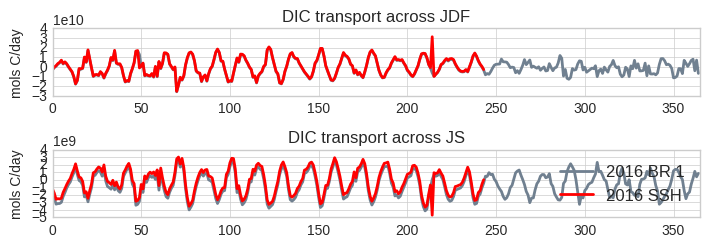

In [15]:
days_in = np.arange(0,365,1)
days_inssh = np.arange(0,244,1)
figstring = 'this'
fig = plt.figure(figsize=(10*0.72,5*0.72))



ax = fig.add_subplot(3,1,2)

ax.plot(days_in,stor_trans_JDF_BR_16_1[0:365],color = 'slategrey',label = '2016 BR', linewidth = 2)
ax.plot(days_inssh,stor_trans_JDF_SSH_16_1[0:365],color = 'red',label = '2016 SSH', linewidth = 2)

plt.xlim([0,365])
#ax.set_xticklabels([])
ax.set_ylabel('mols C/day')
plt.title('DIC transport across JDF')


ax = fig.add_subplot(3,1,3)

plt.xlim([0,365])
#ax.set_xticklabels([])
ax.plot(days_in,stor_trans_JS_BR_16_1[0:365],color = 'slategrey',label = '2016 BR 1', linewidth = 2)
ax.plot(days_inssh,stor_trans_JS_SSH_16_1[0:365],color = 'red',label = '2016 SSH', linewidth = 2)
ax.legend()
ax.set_ylabel('mols C/day')
plt.title('DIC transport across JS')
plt.tight_layout()

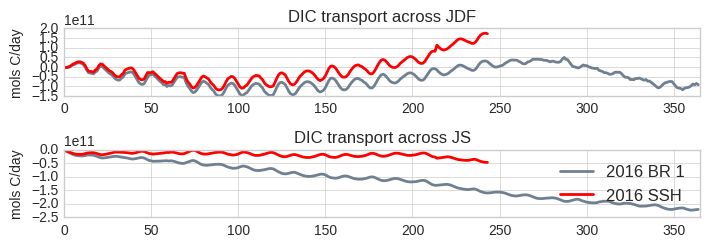

In [16]:
days_in = np.arange(0,365,1)
days_inssh = np.arange(0,244,1)
figstring = 'this'
fig = plt.figure(figsize=(10*0.72,5*0.72))



ax = fig.add_subplot(3,1,2)

ax.plot(days_in,np.cumsum(stor_trans_JDF_BR_16_1[0:365]),color = 'slategrey',label = '2016 BR', linewidth = 2)
ax.plot(days_inssh,np.cumsum(stor_trans_JDF_SSH_16_1[0:365]),color = 'red',label = '2016 SSH', linewidth = 2)

plt.xlim([0,365])
#ax.set_xticklabels([])
ax.set_ylabel('mols C/day')
plt.title('DIC transport across JDF')


ax = fig.add_subplot(3,1,3)

plt.xlim([0,365])
#ax.set_xticklabels([])
ax.plot(days_in,np.cumsum(stor_trans_JS_BR_16_1[0:365]),color = 'slategrey',label = '2016 BR 1', linewidth = 2)
ax.plot(days_inssh,np.cumsum(stor_trans_JS_SSH_16_1[0:365]),color = 'red',label = '2016 SSH', linewidth = 2)
ax.legend()
ax.set_ylabel('mols C/day')
plt.title('DIC transport across JS')
plt.tight_layout()